In [8]:
depVarName = df.columns[-1]

In [18]:
attName

'att_12'

In [42]:
dict.head()

,Attribute_Descr,SQL_Query
Attribute_ID,,
att_0,The price of the Products,"SELECT t0.Purchase_ID, t1.price"
FROM Purchases t0,NaN,NaN
LEFT OUTER JOIN Products t1,NaN,NaN
ON t0.Product_ID = t1.Product_ID,NaN,NaN
att_1,The MAX returned among the previous Purchases ...,"SELECT t0.Purchase_ID, MAX(t2.returned) FROM ..."


In [34]:
dict.loc[attName,'Attribute_Descr']

'The MAX returned among the previous Purchases of the Products where WHERE t2.online = 0'

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_csv('../../output/features/Feature Matrix.csv',index_col=0)
dict = pd.read_csv('../../output/features/Feature Dictionary.csv',index_col=0,sep='\t')
depVarName = df.columns[-1]




In [17]:
df2=df.copy()

In [18]:
df2['binned26'] = pd.cut(df.att_26,bins=10)

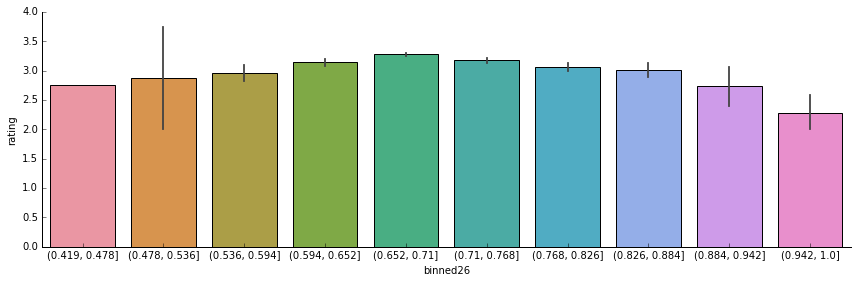

In [19]:
ch=sns.factorplot(x='binned26',y='rating', data=df2,kind='bar',aspect=3)

In [10]:
df.att_26.corr(df.rating)

-0.16482017762424445

In [5]:
df.isnull().sum()

att_0      1795
att_1      1784
att_2      1795
att_3      1795
att_4      1794
att_5      1795
att_6      1795
att_7      1795
att_8      1795
att_9      1795
att_10     1784
att_11     1795
att_12     1795
att_13     1795
att_14     1795
att_15     1795
att_16     1795
att_17     1761
att_18     1795
att_19     1794
att_20     1761
att_21     1795
att_22     1795
att_23     1795
att_24     1795
att_25     1795
att_26     1795
att_27     1795
att_28     1795
att_29     1795
           ... 
att_515    1793
att_516    1780
att_517    1794
att_518    1794
att_519    1792
att_520    1795
att_521    1792
att_522    1795
att_523    1792
att_524    1794
att_525    1795
att_526    1795
att_527    1779
att_528    1795
att_529    1775
att_530    1795
att_531    1795
att_532    1794
att_533    1789
att_534    1795
att_535    1787
att_536    1761
att_537    1795
att_538    1786
att_539    1788
att_540    1795
att_541    1794
att_542    1786
att_543    1795
rating        0
Length: 545, dtype: int6

In [44]:

# author: Michele Samorani
import pandas as pd
import seaborn as sns
from sklearn import linear_model as lm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import os



df = pd.read_csv('../../output/features/Feature Matrix.csv',index_col=0)
dict = pd.read_csv('../../output/features/Feature Dictionary.csv',index_col=0,sep='\t')
depVarName = df.columns[-1]
df2 = df2.fillna(df.mean())
df2 = 100 * (df2 - df2.min()) / (df2.max() - df2.min())
df2[depVarName] = df[depVarName]

X = df2.drop([depVarName],axis=1)
Y = df2[depVarName]


lr = lm.Lasso()
lr.fit(X,Y)
lr.coef_[0]
d={X.columns[i] : lr.coef_[i] for i in range(0,len(X.columns)) }
s=pd.Series(d)
attr = s.abs().sort_values().head(4).index.tolist()
dfViz = df.copy()

i = 1
for attName in attr:
    if df[attName].nunique() > 15:
        dfViz[attName] = pd.cut(x=df[attName],bins=5)
    chart = sns.factorplot(x=attName,y=depVarName,data=dfViz,kind = 'bar', aspect=3)
    chart.set(xlabel=attName, ylabel='Probability of ' + depVarName)
    chart.savefig("../../output/Report/report-source/IMG"+ str(i)  + ".png",dpi=500)
    f = open('../../output/Report/report-source/DESCR'+str(i)+'.txt','w')
    f.write(dict.loc[attName,'Attribute_Descr'])
    f.close()
    i+=1

if df2[depVarName].nunique() > 2:
    regression = True
else:
    regression = False

if not regression:
    nfolds = 10
    kf = KFold(n_splits=nfolds,random_state=2,shuffle=True)
    cl = AdaBoostClassifier()
    auc = cross_val_score(cl,X,y=Y,cv=kf,scoring='roc_auc').mean()
    f = open('../../output/Report/report-source/text_at_bottom.txt','w')
    f.write('Area under the curve obtained by AdaBoost in a 10-fold cross validation: ' +str(round(auc,4)))
    f.close()

NameError: name '__file__' is not defined

In [36]:
if regression:
    from sklearn.model_selection import train_test_split
    import sklearn.metrics
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)
    from sklearn import linear_model
    regLasso = linear_model.LinearRegression()
    regLasso.fit(X_train,y_train)
    y_pred = regLasso.predict(X_test)
    print((y_pred - y_test).abs().mean())

0.375775452226


In [37]:
y_pred[:10]

array([ 3.27734375,  3.1875    ,  3.34375   ,  3.09765625,  3.09765625,
        3.1875    ,  3.1875    ,  2.6484375 ,  3.2578125 ,  3.29296875])

In [42]:
df.groupby('rating').size()

rating
1.00      4
1.50     10
1.75      3
2.00     32
2.25     14
2.50    127
2.75    259
3.00    341
3.25    303
3.50    392
3.75    210
4.00     98
5.00      2
dtype: int64

In [39]:
y_test[:100]

ID
632     3.75
177     3.50
1712    2.75
1384    3.25
1418    2.75
1325    2.75
789     2.50
922     2.50
1305    2.75
746     3.75
34      3.25
683     2.50
675     2.75
66      3.00
1742    3.75
406     3.50
324     5.00
1171    2.00
1371    3.25
796     3.25
1732    3.00
124     2.75
980     3.50
734     3.75
1102    3.25
1234    3.75
1176    3.50
304     2.75
1542    3.00
133     3.75
        ... 
1704    3.50
45      3.50
165     3.25
1598    2.50
1339    3.25
1066    2.75
259     3.00
142     3.00
411     3.25
585     3.50
834     3.50
237     3.00
643     3.50
297     3.25
612     2.75
624     4.00
1031    3.00
533     3.75
1254    3.75
684     3.50
1602    4.00
1709    3.00
172     3.75
602     2.75
202     3.00
498     2.75
1064    3.00
55      3.75
17      3.25
687     3.25
Name: rating, Length: 100, dtype: float64

In [41]:

# author: Michele Samorani
import pandas as pd
import seaborn as sns
from sklearn import linear_model as lm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import os


if __name__ == "__main__":

    df = pd.read_csv('../../output/features/Feature Matrix.csv',index_col=0)
    dict = pd.read_csv('../../output/features/Feature Dictionary.csv',index_col=0,sep='\t')
    depVarName = df.columns[-1]
    depVarName = df.columns[-1]
    df2 = df.fillna(df.mean())
    df2 = 100 * (df2 - df2.min()) / (df2.max() - df2.min())
    X = df2.drop([depVarName],axis=1)
    Y = df2[depVarName] / 100
    
    lr = lm.Lasso()
    lr.fit(X,Y)
    lr.coef_[0]
    d={X.columns[i] : lr.coef_[i] for i in range(0,len(X.columns)) }
    s=pd.Series(d)
    attr = s.abs().sort_values().head(4).index.tolist()
    dfViz = df.copy()
    
    i = 1
    for attName in attr:
        if df[attName].nunique() > 15:
            dfViz[attName] = pd.cut(x=df[attName],bins=5)
        chart = sns.factorplot(x=attName,y=depVarName,data=dfViz,kind = 'bar', aspect=3)
        chart.set(xlabel=attName, ylabel='Probability of ' + depVarName)
        chart.savefig("../../output/Report/report-source/IMG"+ str(i)  + ".png",dpi=500)
        f = open('../../output/Report/report-source/DESCR'+str(i)+'.txt','w')
        f.write(dict.loc[attName,'SQL_Query'])
        f.close()

        i+=1
    
    if df2[depVarName].nunique() > 2:
        regression = True
    else:
        regression = False

    if not regression:
        nfolds = 10
        kf = KFold(n_splits=nfolds,random_state=2,shuffle=True)
        cl = AdaBoostClassifier()
        auc = cross_val_score(cl,X,y=Y,cv=kf,scoring='roc_auc').mean()
        f = open('../../output/Report/report-source/text_at_bottom.txt','w')
        f.write('Area under the curve obtained by AdaBoost in a 10-fold cross validation: ' +str(round(auc,4)))
        f.close()